<a href="https://colab.research.google.com/github/shaina-12/Artificial-Intelligence/blob/main/Machine%20Learning/Fuzzy_C_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing The Necessary Libraries

In [17]:
!pip install sklearn
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Data Generation Step

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

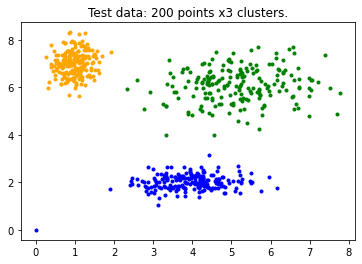

In [19]:
colors = ['b','orange','g','r','c','m','y','k','Brown','ForestGreen']
# define 3 clusters
centers = [[4,2],[1,7],[5,6]]
# define 3 cluster sigmas in x and y, respectively
sigmas = [[0.8,0.3],[0.3,0.5],[1.1,0.7]]
# generate test data
np.random.seed(42) # set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu,ymu),(xsigma,ysigma)) in enumerate(zip(centers, sigmas)):
  xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
  ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
  labels = np.hstack((labels, np.ones(200) * i))
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

Clustering

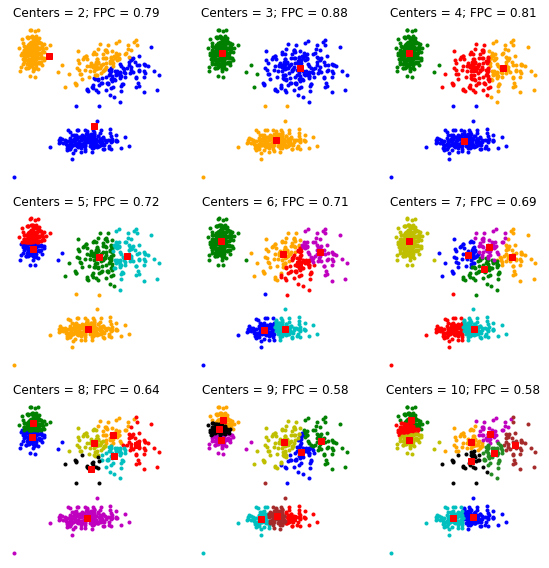

In [20]:
# set up the loop and plot
fig1, axes1 = plt.subplots(3,3,figsize=(8,8))
alldata = np.vstack((xpts,ypts))
fpcs = []
for ncenters, ax in enumerate(axes1.reshape(-1),2):
  cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)
  # Store fpc values for later
  fpcs.append(fpc)
  # Plot assigned clusters, for each data point in training set
  cluster_membership = np.argmax(u, axis=0)
  for j in range(ncenters):
    ax.plot(xpts[cluster_membership == j], ypts[cluster_membership == j], '.', color=colors[j])
  # Mark the center of each fuzzy cluster
  for pt in cntr:
    ax.plot(pt[0], pt[1], 'rs')
    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')
fig1.tight_layout()

The Fuzzy Partition Coefficient (FPC)

Text(0, 0.5, 'Fuzzy Partition Coefficient')

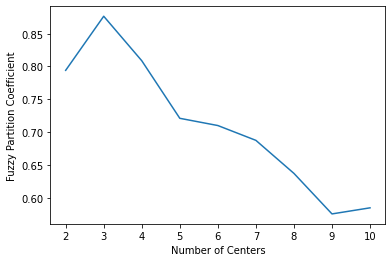

In [21]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of Centers")
ax2.set_ylabel("Fuzzy Partition Coefficient")

Classifying The New Data

Building The Model

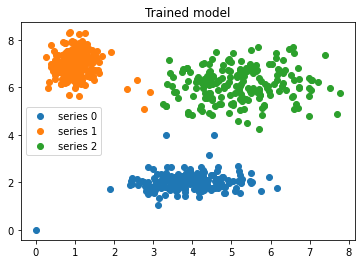

In [22]:
centr, u_orig, _,  _, _, _, _ = fuzz.cluster.cmeans(alldata, 3, 2, error=0.005, maxiter=1000)
fig2, ax2 = plt.subplots()
ax2.set_title('Trained model')
for j in range(3):
    ax2.plot(alldata[0, u_orig.argmax(axis=0) == j],
             alldata[1, u_orig.argmax(axis=0) == j], 'o',
             label='series ' + str(j))
ax2.legend()

Prediction

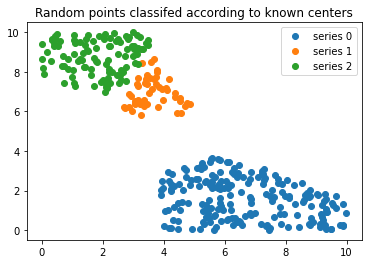

In [23]:
# Generate uniformly sampled data spread across the range [0, 10] in x and y
newdata = np.random.uniform(0, 1, (1100, 2)) * 10
# Predict new cluster membership with `cmeans_predict` as well as
# `cntr` from the 3-cluster model
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(newdata.T, cntr, 2, error=0.005, maxiter=1000)
# Plot the classified uniform data. Note for visualization the maximum
# membership value has been taken at each point (i.e. these are hardened,
# not fuzzy results visualized) but the full fuzzy result is the output
# from cmeans_predict.
cluster_membership = np.argmax(u, axis=0)  # Hardening for visualization
fig3, ax3 = plt.subplots()
ax3.set_title('Random points classifed according to known centers')
for j in range(3):
    ax3.plot(newdata[cluster_membership == j, 0],
             newdata[cluster_membership == j, 1], 'o',
             label='series ' + str(j))
ax3.legend()
plt.show()